# Máquinas de Soporte Vectorial (Support Vector Machine)

En esta práctica utilizaremos varios modelos de Máquinas de Soporte Vectorial (Support Vector Machine, en inglés) para clasificar cada flor de muestra de la famosa tabla "Iris", visualizaremos cómo funciona este algoritmo y determinaremos cuál de ellos funciona mejor.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 10]

In [2]:
# Importamos la tabla desde sci-kit learn
from sklearn.datasets import load_iris

In [3]:
# Cargamos la tabla
iris = load_iris()

El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.

Las variables independientes (largo del sépalo, ancho del sépalo, largo del pétalo y ancho del petalo) se encuentran contenidas en "iris.data", mientras que la variable objetivo (la especie) se encuentra cpontenida en "iris.target".

In [4]:
# Cargamos estas variables
iris_X = iris.data
iris_y = iris.target

Sci-Kit Learn nos proporciona modelos de Máquinas de Soporte Vectorial tanto para realizar regresiones lineales (utilizadas para predecir valores numéricos) como para regresiones logísticas o clasificaciones (utilizadas para predecir etiquetas).

Los modelos que contiene sk-learn son:

Para regresiones lineales: SVR()
Para regresiones logísticas o clasificaciones: SVC()

En este caso utilizaremos el de clasificación para intentar predecir a qué especie pertenece cada flor.

In [5]:
# Importamos el modelo
from sklearn.svm import SVC

In [6]:
# Creamos el modelo
estimador_svm =  SVC()

In [7]:
# Hacemos el ajuste
estimador_svm.fit(iris_X, iris_y)

SVC()

In [8]:
# Hacemos las predicciones
estimador_svm.predict(iris_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

En este caso utilizaremos el método de Validación Cruzada con el criterio de evaluación F1-Score para evaluar cada modelo.

In [9]:
# Importamos el método de validación cruzada
from sklearn.model_selection import cross_val_score

In [10]:
# Realizamos la evaluación
cross_val_score(estimador_svm, X=iris_X, y=iris_y, cv=10, scoring='f1_micro').mean()

0.9733333333333334

Observamos que obtuvimos una calificación muy cercana a 1, lo cual nos quiere decir que el modelo fue muy preciso, casi impecable, pero debemos de tener en cuenta que también el obtener resultados demasiado altos podría conducirnos a un sobreajuste en el modelo.

El parámetro "support_vectors_" nos devuelve los vectores soporte.

In [11]:
# Visualizamos los primeros 10 vectores de soporte
estimador_svm.support_vectors_[:10]

array([[5.7, 3.8, 1.7, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5]])

El parámetro "n_support_" nos dice cuántos vectores soporte (es decir, puntos tocando el margen del hiperplano de decisión) existen por clase, esto nos da una medida de cuán fáciles son de separar cada clase.

In [12]:
# Obtenemos cuántos vectores de soporte hay
estimador_svm.n_support_

array([ 7, 29, 24])

La tabla de Iris contiene 3 clasificaciones. Entonces, hay 7 vectores de soporte de la primera clasificación, 29 de la segunda y 24 de la tercera. Observando estos números podemos intuir que las últimas dos clasificaciones se encuentran muy juntas entre sí, y que la primera se encuentra un poco más apartada de las demás.

## Kernels

Vamos a ver el efecto que tienen diferentes kernels en la creación del hiperplano de decisión.
Para verlo en un gráfico de dispersión tomamos solo las dos primeras variables del dataset (longitud y grosor del sépalo).

In [13]:
X = iris.data[:, :2]
y = iris.target

In [14]:
# Importamos mlxtend para graficar
from mlxtend.plotting import plot_decision_regions

### Primer modelo: Kernel Lineal

<AxesSubplot:>

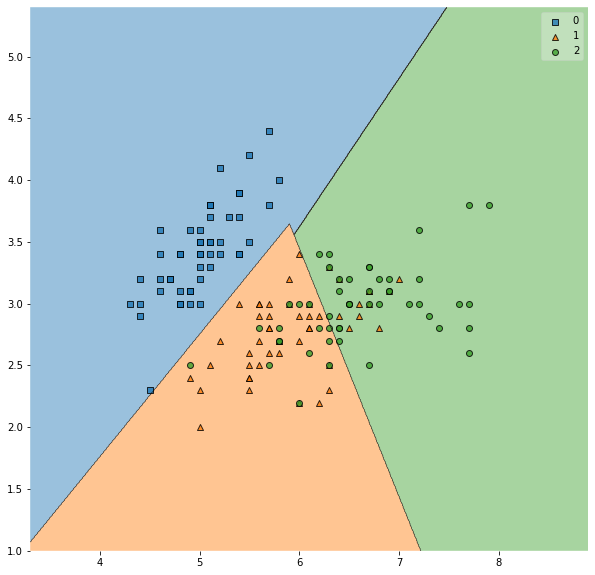

In [15]:
# Creamos el modelo, lo ajustamos y graficamos

estimador_svm_lineal = SVC(kernel="linear")
estimador_svm_lineal.fit(X, y)

plot_decision_regions(X, y, clf=estimador_svm_lineal)

In [16]:
# Evaluación del modelo
modelo_1 = cross_val_score(estimador_svm_lineal, X=X, y=y, cv=10, scoring='f1_micro').mean()
modelo_1

0.8133333333333335

### Segundo modelo: Kernel Polinomial

Al Kernel Polinomial le viene asignado por defecto un grado 3.

<AxesSubplot:>

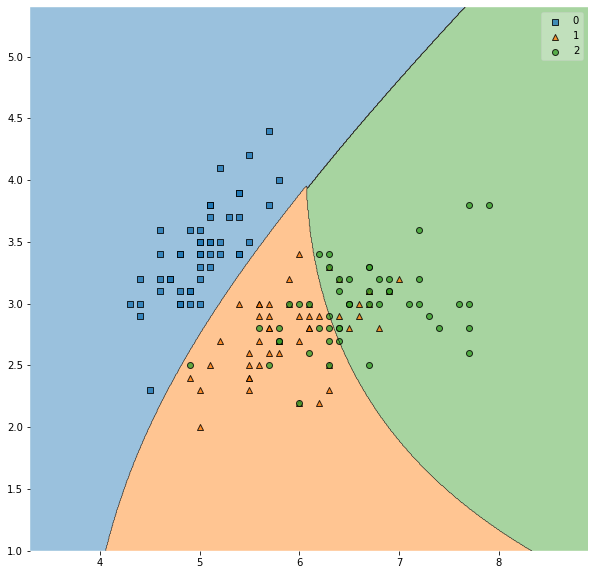

In [17]:
# Creamos el modelo, lo ajustamos y graficamos

estimador_svm_polinomial = SVC(kernel="poly")
estimador_svm_polinomial.fit(X, y)

plot_decision_regions(X, y, clf=estimador_svm_polinomial)

In [18]:
# Evaluación del modelo
modelo_2 = cross_val_score(estimador_svm_polinomial, X=X, y=y, cv=10, scoring='f1_micro').mean()
modelo_2

0.8066666666666669

### Tercer modelo: Kernel Polinomial Grado 1

Podemos ver cómo varía la frontera de decisión en función de los grados de expansión. Cuantos más grados más complejo podrá ser el hiperplano. Con grado 1 se convierte en un kernel lineal.

<AxesSubplot:>

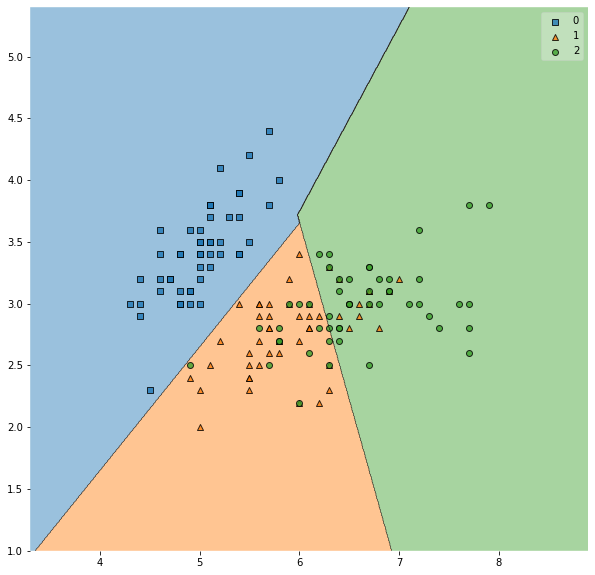

In [19]:
# Creamos el modelo, lo ajustamos y graficamos

estimador_svm_polinomial_grado_1 = SVC(kernel="poly", degree=1).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_polinomial_grado_1)

In [20]:
# Evaluación del modelo
modelo_3 = cross_val_score(estimador_svm_polinomial_grado_1, X=X, y=y, cv=10, scoring='f1_micro').mean()
modelo_3

0.8200000000000001

### Cuarto modelo: Kernel Polinomial Grado 2

<AxesSubplot:>

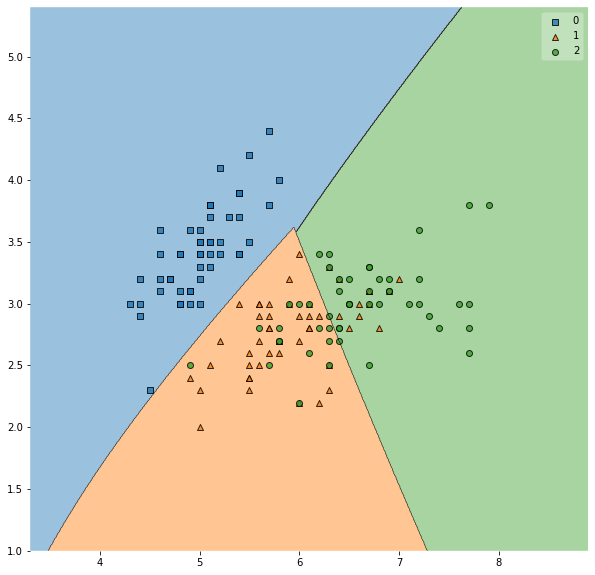

In [21]:
# Creamos el modelo, lo ajustamos y graficamos

estimador_svm_polinomial_grado_2 = SVC(kernel="poly", degree=2).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_polinomial_grado_2)

In [22]:
# Evaluación del modelo
modelo_4 = cross_val_score(estimador_svm_polinomial_grado_2, X=X, y=y, cv=10, scoring='f1_micro').mean()
modelo_4

0.8133333333333335

### Quinto modelo: Kernel Polinomial Grado 6

<AxesSubplot:>

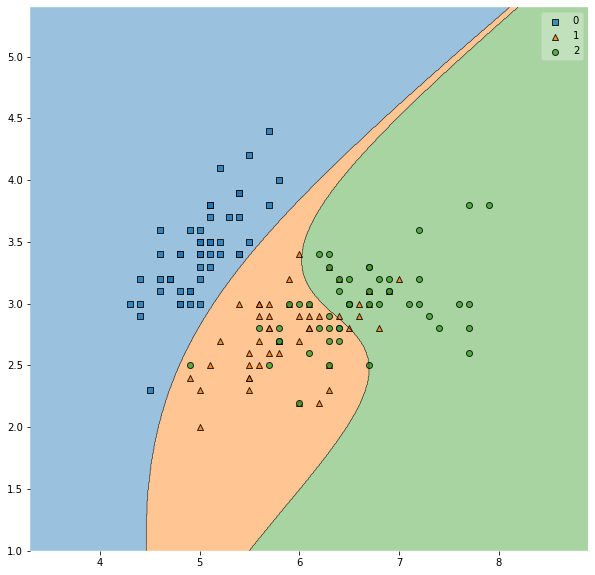

In [23]:
# Creamos el modelo, lo ajustamos y graficamos

estimador_svm_polinomial_grado_6 = SVC(kernel="poly", degree=6).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_polinomial_grado_6)

In [24]:
# Evaluación del modelo
modelo_5 = cross_val_score(estimador_svm_polinomial_grado_6, X=X, y=y, cv=10, scoring='f1_micro').mean()
modelo_5

0.7866666666666668

Vemos que para un Kernel Polinomial de grado 6 las figuras que clasifican los puntos ahora son curvas más pronunciadas. Si seguimos aumentando los grados del polinomio, las figuras se volverán cada vez más complejas, pero también los cálculos se hacen más pesados computacionalmente.

### Sexto modelo: Kernel Polinomial Grado 3 Gamma 0.5

El kernel polinomial tiene también el parámetro que lo regula, "alpha" en la ecuación de arriba, aunque en la implementación de scikit-learn se llama "gamma".

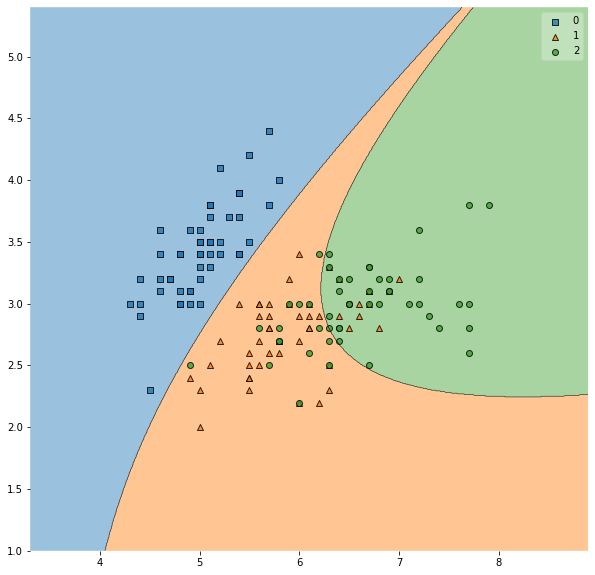

In [25]:
# Creamos el modelo, lo ajustamos y graficamos

estimador_svm_polinomial_gamma = SVC(kernel="poly", degree=3, gamma=0.5).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_polinomial_gamma);

In [26]:
# Evaluación del modelo
modelo_6 = cross_val_score(estimador_svm_polinomial_gamma, X=X, y=y, cv=10, scoring='f1_micro').mean()
modelo_6

0.8000000000000002

###  Séptimo modelo: Kernel Gaussiano

El kernel gausiano (radial basis function, o rbf) hace una transformacion radial (esto es, en funcion de la distancia de los puntos al origen).

<AxesSubplot:>

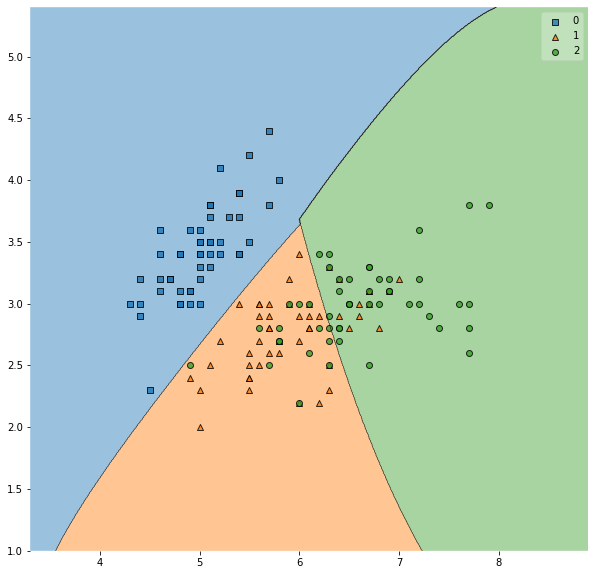

In [27]:
# Creamos el modelo, lo ajustamos y graficamos

estimador_svm_rbf = SVC(kernel="rbf")
estimador_svm_rbf.fit(X, y)

plot_decision_regions(X, y, clf=estimador_svm_rbf)

In [28]:
# Evaluación del modelo
modelo_7 = cross_val_score(estimador_svm_rbf, X=X, y=y, cv=10, scoring='f1_micro').mean()
modelo_7

0.8266666666666668

### Octavo modelo: Kernel Gaussiano Gamma 0.7

Podemos probar cómo varía la frontera de decisión en función de gamma.

<AxesSubplot:>

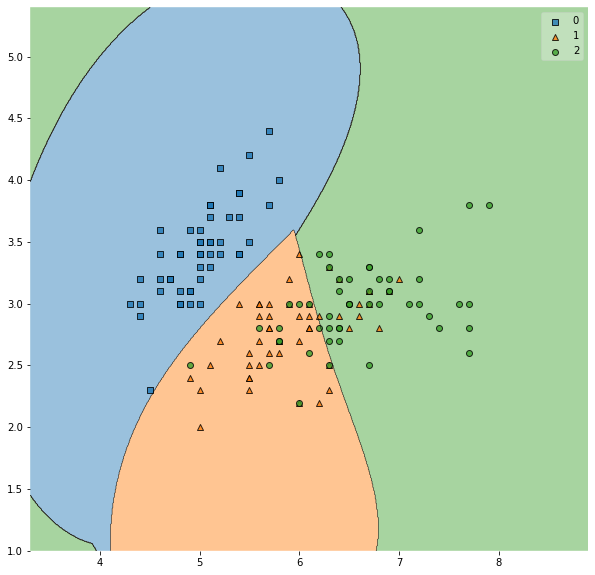

In [29]:
# Creamos el modelo, lo ajustamos y graficamos

estimador_svm_rbf_gamma = SVC(kernel="rbf", gamma=0.7).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_rbf_gamma)

In [30]:
# Evaluación del modelo
modelo_8 = cross_val_score(estimador_svm_rbf_gamma, X=X, y=y, cv=10, scoring='f1_micro').mean()
modelo_8

0.8066666666666669

En este caso, variando la gamma también podemos obtener figuras más complejas. Esto no quiere decir necesariamente que sean mejores clasificaciones. Si comparamos este modelo con el anterior, vemos que el anterior fue más preciso y con figuras más simples.

### Noveno modelo: Kernel Gaussiano Gamma 10

<AxesSubplot:>

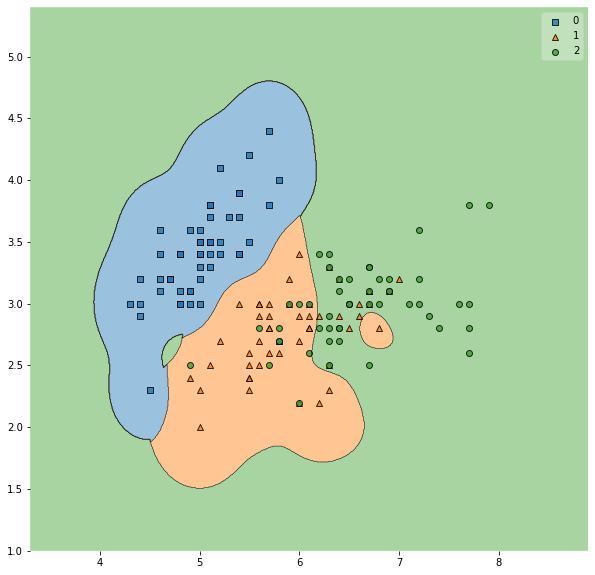

In [31]:
# Creamos el modelo, lo ajustamos y graficamos

estimador_svm_rbf_gamma_10 = SVC(kernel="rbf", gamma=10).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_rbf_gamma_10)

In [32]:
# Evaluación del modelo
modelo_9 = cross_val_score(estimador_svm_rbf_gamma_10, X=X, y=y, cv=10, scoring='f1_micro').mean()
modelo_9

0.78

Observamos que cuanto más aumentamos la gamma, comienzan a aparecer pequeñas islas, señal de que podemos estar cayendo en un sobreajuste del modelo.

### Décimo modelo: Kernel Gaussiano Gamma 100

Ahora, elegimos una gamma muy alta para ver qué sucede.

<AxesSubplot:>

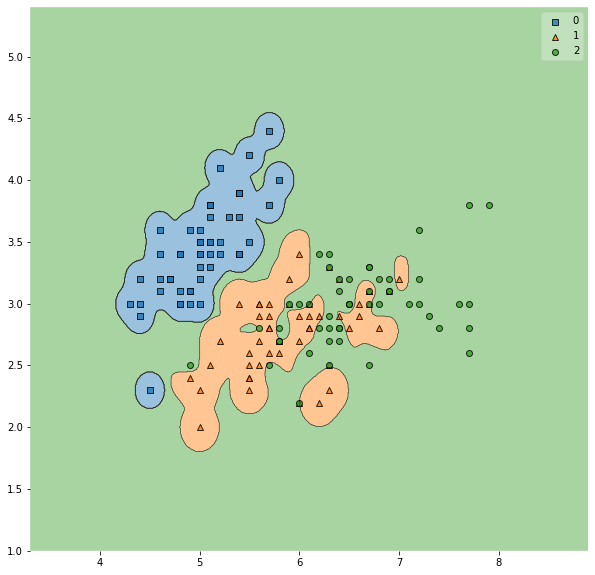

In [33]:
# Creamos el modelo, lo ajustamos y graficamos

estimador_svm_rbf_gamma_100 = SVC(kernel="rbf", gamma=100).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_rbf_gamma_100)

In [34]:
# Evaluación del modelo
modelo_10 = cross_val_score(estimador_svm_rbf_gamma_100, X=X, y=y, cv=10, scoring='f1_micro').mean()
modelo_10

0.6399999999999999

Vemos que ahora sí caímos en un sobreajuste total del modelo, además de que las clasificaciones de éste empeoraron.

In [35]:
resultados = {}

resultados['Primer_modelo'] = modelo_1
resultados['Segundo_modelo'] = modelo_2
resultados['Tercer_modelo'] = modelo_3
resultados['Cuarto_modelo'] = modelo_4
resultados['Quinto_modelo'] = modelo_5
resultados['Sexto_modelo'] = modelo_6
resultados['Septimo_modelo'] = modelo_7
resultados['Octavo_modelo'] = modelo_8
resultados['Noveno_modelo'] = modelo_9
resultados['Decimo_modelo'] = modelo_10

resultados

{'Primer_modelo': 0.8133333333333335,
 'Segundo_modelo': 0.8066666666666669,
 'Tercer_modelo': 0.8200000000000001,
 'Cuarto_modelo': 0.8133333333333335,
 'Quinto_modelo': 0.7866666666666668,
 'Sexto_modelo': 0.8000000000000002,
 'Septimo_modelo': 0.8266666666666668,
 'Octavo_modelo': 0.8066666666666669,
 'Noveno_modelo': 0.78,
 'Decimo_modelo': 0.6399999999999999}

De todos los modelos utilizados en esta práctica, el mejor de ellos, es decir, el que tuvo una puntuación F1-Score más alta fue el séptimo modelo, el de Kernel Guassiano.

En realidad no es necesario graficar cada modelo, solamente lo hice para observar mejor cómo funciona el modelo de Máquinas de Soporte Vectorial. Las gráficas se pudieron realizar porque sólo tomamos en cuenta 2 variables independientes. En la realidad no tendrás sólo 2, tendrás muchas más, por lo cual será imposible graficar (ya que no se puede graficar arriba de 3 dimensiones), por lo cual el criterio que más importa para evaluar la validación cruzada. Los resultados que te arroja te son suficientes para evaluar y comparar.